# Hypothyroid

## บทนำ
โรคไฮโปไทรอยด์ คือ ภาวะที่ต่อมไทรอยด์ (Thyroid Gland) ผลิตฮอร์โมนไทรอยด์ ออกมาไม่เพียงพอ โดยฮอร์โมนไทรอยด์นั้นจะควบคุมกระบวนการใช้พลังงานของเซลล์ต่าง ๆ ในร่างกายหรือที่เรียกว่ากระบวนการเมตาบอลิซึม โดยกระบวนการเมตาบอลิซึมส่งผลต่ออุณหภูมิ อัตราการเต้นหัวใจ และการเผาผลาญพลังงาน หากร่างกายผลิตฮอร์โมนไทรอยด์ไม่เพียงพอ จะส่งผลให้กระบวนการทำงานของร่างกายช้าลงซึ่งจะส่งผลให้ อ่อยเพลีย น้ำหนักขึ้น หนาวง่าย ท้องผูก เป็นต้น โดยข้อมูลหลักๆเกี่ยวกับฮอร์โมนที่เกี่ยวข้องกับโรคมีดังนี้

1.triiodothyronine (T3) เป็นฮอร์โมนจากต่อมไทรอยด์ ช่วยไปกระตุ้นการเจริญเติบโตและพัฒนาการของร่างกาย

2.Thyroid stimulating hormone (TSH) เป็นฮอร์โมนที่สร้างจากต่อมใต้สมอง pituitary gland ทำหน้าที่กระตุ้นให้ต่อมไทรอยด์ Thyroid gland สร้างฮอร์โมน T3

3.thyroxine (T4) มีหน้าที่ควบคุมอัตราเร็วของเมแทบอลิซึมเพื่อผลิตพลังงานให้แก่ร่างกาย

4.Free thyroxine index(FTI) บ่งบอกถึงปริมาณฮอร์โมนไทรอยด์ในร่างกาย TSH ซึ่งเป็นฮอร์โมนที่หลั่งมาจากต่อมใต้สมอง เพื่อดูว่าในร่างกายมีปริมาณฮอร์โมนไทรอยด์เพียงพอหรือไม่ ถ้าฮอร์โมนไทรอยด์มีไม่พอจะทำระดับ TSH สูงขึ้น

5.Thyroxine – binding globulin (TBG) test เป็นการวัดระดับของ Thyroxine – binding globulin ในซีรั่ม ซึ่งเป็นโปรตีนที่สร้างจากตับ มีหน้าที่จับไทรอยด์ฮอร์โมนเพื่อป้องกันมิให้ไตขับไทรอยด์ฮอร์โมนออกแต่ถ้าไทรอยด์ฮอร์โมนในเลือดมีน้อยลง ฮอร์โมนที่จับก็จะหลุดออกมาในกระแสเลือด

6.Total T4 (TT4) = ไทรอกซินทั้งหมดในเลือด ทั้งส่วนที่จับกับโปรตีนและส่วนที่เป็นอิสระ

7.Thyroxine utilization rates (T4U) = อัตราการใช้ไทรอกซิน

ข้อมูลที่เราจะนำมาวิเคราห์เกี่ยวกับการเรียนรู้ของเครื่องจักรคือ ข้อมูลของผู้ป่วยโรค Hypothyroid เป็นหนึงในชุดข้อมูลจาก Thyroid Disease Data Set ของ Ross Quinlan ที่อยู่ใน  University of California at Irvine ในปีคริสศักราช 1987 ซึ่งเราจะแดสงให้เห็นเกี่ยวกับความสัมพันธ์ระหว่างฮอร์โมนต่างๆที่ส่งผลต่อกัน และตัวโรคโดยใช้การนำเสนอข้อมูลทางสถิติ และความรู้ในเรื่อง machine learning

Link : https://archive.ics.uci.edu/ml/datasets/thyroid+disease


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
hypo_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"
Hypo = pd.read_csv(hypo_url, header = None)
Hypo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


In [3]:
Hypo.to_excel('hypothyroid.xlsx',index=False)

## ลักษณะของข้อมูล

ข้อมูลจะมีทั้งหมด 26 คอลัมภ์และ 3163 ประกอบด้วย

result = ผลตรวจว่าเป็น hypot้yroid หรือไม่

age = อายุ

sex = เพศ

on_thyroxine = เกี่ยวกับ thyroxine

query_on_thyroxine = แบบทดสอบเกี่ยวกับ thyroxine 

on_antithyroid_medication = การรับยาต้านไทรอยด์

thyroid_surgery = การผ่าตัดไทรอยด์

query_hypothyroid = แบบทดสอบ hypothyroid

query_hyperthyroid = แบบทดสอบ hyperthyroid

pregnant = การตั้งครรย์

sick = มีการแสดงอาการ

tumor = มีเนื้องอก

lithium = ได้รับ lithium (ยา)

goitre = อาการคอพอก

TSH_measured = วัด THS แล้ว

TSH = ปริมาณ TSH

T3_measure = วัด T3 แล้ว

T3 = ปริมาณ T3

TT4_measured = วัด TT4 แล้ว

TT4 = ปริมาณ TT4

T4U_measured = วัด T4U แล้ว

T4U = ปริมาณ T4U

FTI_measured = วัด FTI แล้ว

FTI = ปริมาณ FTI

TBG_measured = วัด TBG แล้ว

TBG = ปริมาณ TBG

In [4]:
Hypo.columns=['result','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
              'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3',
              'TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']
Hypo

,result,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


## หลักการและขั้นตอน การสกัด การเลือก และการเตรียมลักษณะ

เราจะเลือกบางคอลัมภ์มาใช้ในการพิจารณาข้อมูล ซึ่งจะไปกอบไปด้วย result , age , sex on_thyroxine , query_on_thyroxine , on_antithyroid_medication , thyroid_surgery , query_hypothyroid , query_hyperthyroid , pregnant , sick , tumor , lithium , goitre , TSH , T3 , TT4 , T4U , FTI เนื่องจากบางคอลัมภ์เป็นข้อมูลที่เสียหายเช่น TBG จึงจะตัดออก

In [5]:
Hypo=Hypo[['result','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
      'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH','T3','TT4','T4U','FTI']]
Hypo

,result,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30,0.60,15,1.48,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145,1.70,19,1.13,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0,0.20,4,1,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,430,0.40,6,1.04,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,7.30,1.20,57,1.28,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,5.80,1.70,86,0.91,95
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,0.80,1.80,99,1.01,98
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,1.20,0.60,71,0.68,104
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,1.30,0.10,65,0.48,137


In [6]:
Hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   result                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH     

นำค่า NULL Value ออก และทำ one hot encoding โดย

1.ถ้าเป็นเพศหญิงค่าเป็น 1 และชายเป็น 0

2.ถ้าเป็นโรคให้ค่าเป็น 0 ถ้าไม่เป็นให้เป็น 1

3.ส่วนข้อมูลอื่นๆที่มีค่า True จะให้เป็น 1 ถ้า False เป็น 0

In [7]:
Hypo=Hypo.query("sex!='?'")
Hypo=Hypo.query("TSH!='?'")
Hypo=Hypo.query("T3!='?'")
Hypo=Hypo.query("TT4 !='?'")
Hypo=Hypo.query("T4U!='?'")
Hypo=Hypo.query("FTI!='?'")
Hypo=Hypo.query("age!='?'")
Dict_result={'negative':1,'hypothyroid':0}
Dict_Sex = {'M':0, 'F':1}
Dict_check = {'f':0,'t':1}

Hypo['result']=Hypo['result'].replace(Dict_result).astype('category')
Hypo['on_thyroxine']=Hypo['on_thyroxine'].replace(Dict_check).astype('category')
Hypo['query_on_thyroxine']=Hypo['query_on_thyroxine'].replace(Dict_check).astype('category')
Hypo['on_antithyroid_medication']=Hypo['on_antithyroid_medication'].replace(Dict_check).astype('category')
Hypo['thyroid_surgery']=Hypo['thyroid_surgery'].replace(Dict_check).astype('category')
Hypo['query_hypothyroid']=Hypo['query_hypothyroid'].replace(Dict_check).astype('category')
Hypo['query_hyperthyroid']=Hypo['query_hyperthyroid'].replace(Dict_check).astype('category')
Hypo['pregnant']=Hypo['pregnant'].replace(Dict_check).astype('category')
Hypo['sick']=Hypo['sick'].replace(Dict_check).astype('category')
Hypo['tumor']=Hypo['tumor'].replace(Dict_check).astype('category')
Hypo['lithium']=Hypo['lithium'].replace(Dict_check).astype('category')
Hypo['goitre']=Hypo['goitre'].replace(Dict_check).astype('category')
Hypo['sex']=Hypo['sex'].replace(Dict_Sex).astype('category')

Hypo['age']=Hypo['age'].astype('int64')
Hypo['TSH']=Hypo['TSH'].astype('float')
Hypo['T3']=Hypo['T3'].astype('float')
Hypo['TT4']=Hypo['TT4'].astype('float')
Hypo['T4U']=Hypo['T4U'].astype('float')
Hypo['FTI']=Hypo['FTI'].astype('float')
Hypo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   result                     2000 non-null   category
 1   age                        2000 non-null   int64   
 2   sex                        2000 non-null   category
 3   on_thyroxine               2000 non-null   category
 4   query_on_thyroxine         2000 non-null   category
 5   on_antithyroid_medication  2000 non-null   category
 6   thyroid_surgery            2000 non-null   category
 7   query_hypothyroid          2000 non-null   category
 8   query_hyperthyroid         2000 non-null   category
 9   pregnant                   2000 non-null   category
 10  sick                       2000 non-null   category
 11  tumor                      2000 non-null   category
 12  lithium                    2000 non-null   category
 13  goitre                     2000 n

In [8]:
Hypo.to_excel('hypothyroid_cleansing.xlsx',index=False)

## เทคนิคที่ใช้

In [9]:
Hypo[Hypo['result']==0].describe()

,age,TSH,T3,TT4,T4U,FTI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,55.885246,60.496721,1.159836,36.516393,1.054344,34.477869
std,19.891523,73.749184,0.934346,28.915318,0.206141,23.314177
min,5.000000,0.000000,0.200000,2.000000,0.610000,0.000000
25%,42.000000,20.250000,0.400000,15.000000,0.940000,13.250000
50%,61.000000,35.000000,0.900000,35.000000,1.030000,35.500000
75%,72.000000,70.750000,1.775000,50.000000,1.137500,51.000000
max,88.000000,530.000000,6.700000,230.000000,1.790000,133.000000


In [10]:
Hypo[Hypo['result']==1].describe()

,age,TSH,T3,TT4,T4U,FTI
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,53.475506,2.557971,1.974601,111.967146,0.983733,115.031949
std,19.259941,9.274159,0.952023,41.949821,0.232498,36.989409
min,1.000000,0.000000,0.050000,4.000000,0.000000,0.000000
25%,37.000000,0.000000,1.400000,86.000000,0.850000,93.000000
50%,57.000000,0.600000,1.900000,105.000000,0.960000,108.000000
75%,70.000000,1.700000,2.300000,128.000000,1.060000,129.000000
max,98.000000,200.000000,9.800000,450.000000,2.030000,450.000000


Text(0, 0.5, 'FTI')

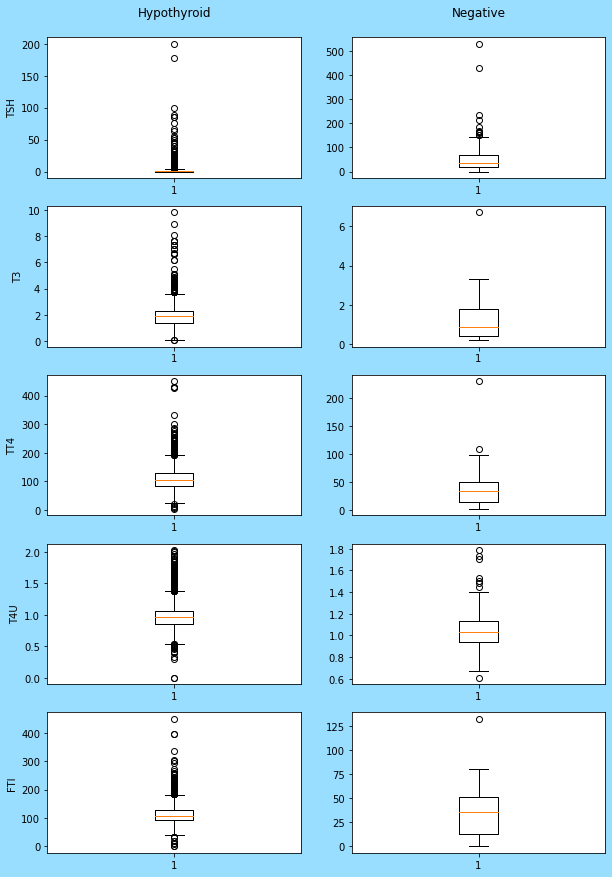

In [11]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(10,15),facecolor='#99DDFF')
axes[0,0].set_title('Hypothyroid\n')
axes[0,0].set_ylabel('TSH')
axes[0,1].set_title('Negative\n')
axes[0,0].boxplot(Hypo[Hypo['result']==1]['TSH'])
axes[0,1].boxplot(Hypo[Hypo['result']==0]['TSH'])


axes[1,0].boxplot(Hypo[Hypo['result']==1]['T3'])
axes[1,1].boxplot(Hypo[Hypo['result']==0]['T3'])

axes[1,0].set_ylabel('T3')

axes[2,0].boxplot(Hypo[Hypo['result']==1]['TT4'])
axes[2,1].boxplot(Hypo[Hypo['result']==0]['TT4'])

axes[2,0].set_ylabel('TT4')

axes[3,0].boxplot(Hypo[Hypo['result']==1]['T4U'])
axes[3,1].boxplot(Hypo[Hypo['result']==0]['T4U'])

axes[3,0].set_ylabel('T4U')

axes[4,0].boxplot(Hypo[Hypo['result']==1]['FTI'])
axes[4,1].boxplot(Hypo[Hypo['result']==0]['FTI'])
axes[4,0].set_ylabel('FTI')

### Data information
#### ตรวจสอบการกระจายของข้อมูล
ตรวจสอบข้อมูลเบื้องต้นโดยจะเปรียบเทียบข้อมูลของฮอร์โมนต่างๆในร่างกายของผู่ที่เป็นโรคไฮโปไทรอย และไม่เป็นจากกราฟโดยได้ผลลัพธ์ว่า

- ในคนที่เป็นให้โรคจะมีค่าของฮอร์โมน TSH มากกว่า คนที่ไม่เป็น โดยคนที่เป็นจะเกาะกลุ่มอยู่ในช่วง 20-70 ในขณะคนที่ไม่เป้นจะอยู่ในช่วง 0-1

- ในคนที่เป็นให้โรคจะมีค่าของฮอร์โมน T3 ใกล้เคียงกับคนที่ไม่เป็นโรคโดยจะเฉลี่ยอยู่ที่ 1.1598 และ 1.9746 ตามลำดับ

- ในคนที่เป็นให้โรคจะมีค่าของฮอร์โมน TT4 น้อยกว่า คนที่ไม่เป็น โดยคนที่เป็นจะเกาะกลุ่มอยู่ในช่วง 15-50 ในขณะคนที่ไม่เป้นจะอยู่ในช่วง 86-128

- ในคนที่เป็นให้โรคจะมีค่าของฮอร์โมน T4U ใกล้เคียงกับคนที่ไม่เป็นโรคโดยจะเฉลี่ยอยู่ที่ 1.0543 และ 0.9837 ตามลำดับ8

- ในคนที่เป็นให้โรคจะมีค่าของฮอร์โมน FTI น้อยกว่า คนที่ไม่เป็น โดยคนที่เป็นจะเกาะกลุ่มอยู่ในช่วง 13-51 ในขณะคนที่ไม่เป้นจะอยู่ในช่วง 93-129

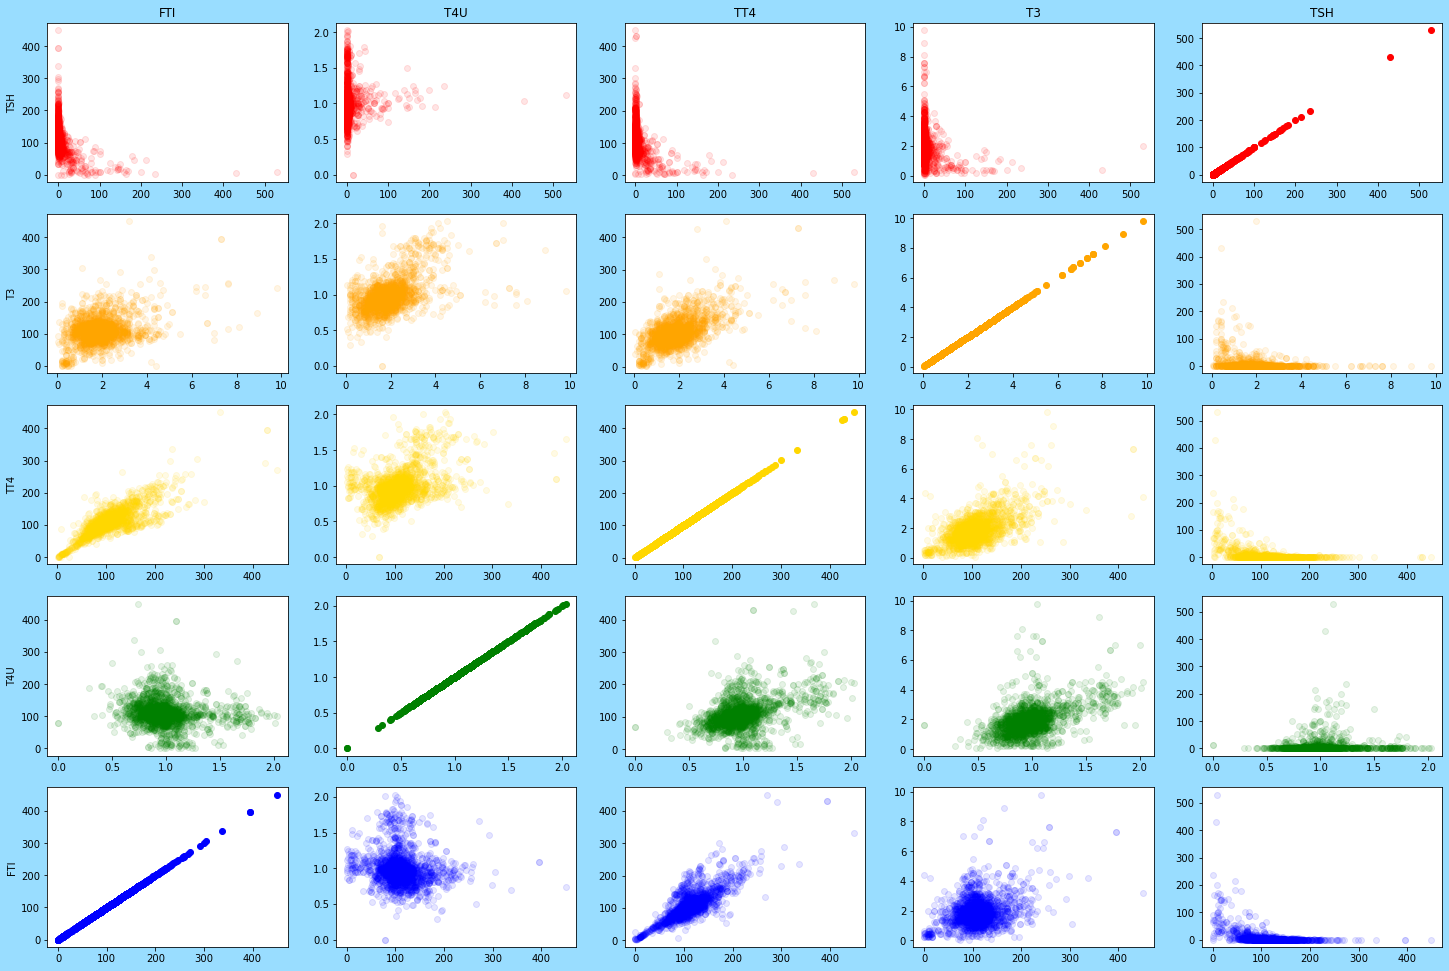

In [12]:
fig, axes = plt.subplots(nrows=5,ncols=5,figsize=(25,17),facecolor='#99DDFF')
axes[0,0].set_title('Hypothyroid\n')

axes[0,4].set_title('TSH')
axes[0,3].set_title('T3')
axes[0,2].set_title('TT4')
axes[0,1].set_title('T4U')
axes[0,0].set_title('FTI')
axes[0,0].set_ylabel('TSH')
axes[1,0].set_ylabel('T3')
axes[2,0].set_ylabel('TT4')
axes[3,0].set_ylabel('T4U')
axes[4,0].set_ylabel('FTI')

axes[0,4].scatter(Hypo['TSH'],Hypo['TSH'],c='r')
axes[1,3].scatter(Hypo['T3'],Hypo['T3'],c='orange')
axes[2,2].scatter(Hypo['TT4'],Hypo['TT4'],c='gold')
axes[3,1].scatter(Hypo['T4U'],Hypo['T4U'],c='g')
axes[4,0].scatter(Hypo['FTI'],Hypo['FTI'],c='b')

axes[0,0].scatter(Hypo['TSH'],Hypo['FTI'],c='r',alpha=0.1)
axes[0,1].scatter(Hypo['TSH'],Hypo['T4U'],c='r',alpha=0.1)
axes[0,2].scatter(Hypo['TSH'],Hypo['TT4'],c='r',alpha=0.1)
axes[0,3].scatter(Hypo['TSH'],Hypo['T3'],c='r',alpha=0.1)

axes[1,0].scatter(Hypo['T3'],Hypo['FTI'],c='orange',alpha=0.1)
axes[1,1].scatter(Hypo['T3'],Hypo['T4U'],c='orange',alpha=0.1)
axes[1,2].scatter(Hypo['T3'],Hypo['TT4'],c='orange',alpha=0.1)
axes[1,4].scatter(Hypo['T3'],Hypo['TSH'],c='orange',alpha=0.1)

axes[2,0].scatter(Hypo['TT4'],Hypo['FTI'],c='gold',alpha=0.1)
axes[2,1].scatter(Hypo['TT4'],Hypo['T4U'],c='gold',alpha=0.1)
axes[2,3].scatter(Hypo['TT4'],Hypo['T3'],c='gold',alpha=0.1)
axes[2,4].scatter(Hypo['TT4'],Hypo['TSH'],c='gold',alpha=0.1)

axes[3,0].scatter(Hypo['T4U'],Hypo['FTI'],c='g',alpha=0.1)
axes[3,2].scatter(Hypo['T4U'],Hypo['TT4'],c='g',alpha=0.1)
axes[3,3].scatter(Hypo['T4U'],Hypo['T3'],c='g',alpha=0.1)
axes[3,4].scatter(Hypo['T4U'],Hypo['TSH'],c='g',alpha=0.1)

axes[4,1].scatter(Hypo['FTI'],Hypo['T4U'],c='b',alpha=0.1)
axes[4,2].scatter(Hypo['FTI'],Hypo['TT4'],c='b',alpha=0.1)
axes[4,3].scatter(Hypo['FTI'],Hypo['T3'],c='b',alpha=0.1)
axes[4,4].scatter(Hypo['FTI'],Hypo['TSH'],c='b',alpha=0.1)

#### ตรวจสอบความสัมพันธ์ระหว่างตัวแปรโดยใช้ scatter plot

สามารถกล่าวได้ว่า

- TSH มีความสัมพันธ์เชิงเส้นตรงกับฮอโมนอื่นๆ ค่อนข้างน้อย

- T3 มีความสัมพันธิเชิงเส้นตรงกับ T4U และ TT4 

- TT4 มีความสัมพันธิเชิงเส้นตรงกับ FTI

- T4U มีความสัมพันธ์เชิงเส้นตรงกับ FTI น้อย


# Machine Learning

In [13]:
array_Hypo = Hypo.to_numpy()
X = array_Hypo[:,1:]
Y = array_Hypo[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [14]:
SVC_model = SVC(gamma='auto')
SVC_model.fit(X_train, Y_train)
SVC_pre = SVC_model.predict(X_test)

LR_model = LogisticRegression(solver='liblinear', multi_class='ovr')
LR_model.fit(X_train, Y_train)
LR_pre = LR_model.predict(X_test)

MLP_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4, random_state=1)
MLP_model.fit(X_train, Y_train)
MLP_pre = MLP_model.predict(X_test)

NBay_model = GaussianNB()
NBay_model.fit(X_train, Y_train)
NBay_pre = NBay_model.predict(X_test)


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Logistic regression\n')
print(confusion_matrix(Y_test,LR_pre))
print('Accurrancy = ',accuracy_score(Y_test,LR_pre))
print(classification_report(Y_test,LR_pre))
print('--------------------------------------------------------------------------------------------------------------')
print('Support vector machine\n')
print(confusion_matrix(Y_test,SVC_pre))
print('Accurrancy = ',accuracy_score(Y_test,SVC_pre))
print(classification_report(Y_test,SVC_pre))
print('--------------------------------------------------------------------------------------------------------------')
print('Multilayer perceptron\n')
print(confusion_matrix(Y_test,MLP_pre))
print('Accurrancy = ',accuracy_score(Y_test,MLP_pre))
print(classification_report(Y_test,MLP_pre))
print('--------------------------------------------------------------------------------------------------------------')
print('Naive Bay\n')
print(confusion_matrix(Y_test,NBay_pre))
print('Accurrancy = ',accuracy_score(Y_test,NBay_pre))
print(classification_report(Y_test,NBay_pre))
print('--------------------------------------------------------------------------------------------------------------')

Logistic regression

[[ 17   7]
 [  0 376]]
Accurrancy =  0.9825
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        24
         1.0       0.98      1.00      0.99       376

    accuracy                           0.98       400
   macro avg       0.99      0.85      0.91       400
weighted avg       0.98      0.98      0.98       400

--------------------------------------------------------------------------------------------------------------
Support vector machine

[[  5  19]
 [  0 376]]
Accurrancy =  0.9525
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.34        24
         1.0       0.95      1.00      0.98       376

    accuracy                           0.95       400
   macro avg       0.98      0.60      0.66       400
weighted avg       0.95      0.95      0.94       400

------------------------------------------------------------------------------------------------------

## การประเมินประสิทธิภาพของแบบจำลอง
โดยเราได้เลือกตัวแบบมาทั้งหมด 4 ตัวแบบคือ 

### 1.Logistic regression(LR) 
สามารถทายคนที่เป็นโรคได้ 98% และไม่เป็นโรคได้ถึง 100% แต่เมื่อพิจารณาค่า recall จะพบว่าจะมีค่าไม่สูงมากเนื่องจากมีทายผิดอยู่ 7 คน จากทั้งหมด 24 คนของคนเป็นโรคทั้งหมด

### 2.Support vector machine(SVM)
ในตัวแบบนี้มีโอกาสทายผิดค่อนข้างสูง

### 3.Multilayer perceptron(MLP)
ในตัวแบบนี้มีโอกาสทายผิดที่ต่ำมาก โดยเมื่อพิจารณาค่า recall และ precision แล้วมีค่าที่ค่อนข้างสูง

 
### 4.Naive Bay(NB)
ตัวแบบนี้มีโอกาสทายคนที่ไม่ป่วยว่าป่วย(False Positive) สูงแต่ทายคนที่เป็นโรคถูกทั้งหมด เมื่อพิจารณาในมุมด้านการแพทย์แล้วตัวแบบนี้จะดีกว่าตัวแบบอื่นๆ เพราะการเป็นโรคจะส่งผลต่อชีวิตของคนไข้ ดังนั้นการที่ตัวแบบทำนายออกมาเป็น False Positive จะดีกว่ามีค่าออกมาเป็น False Negative
